In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
# print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.
from pandas import read_csv
#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housings.csv', header=None, delimiter=r"\s+", names=column_names)
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [38]:
data.shape



X= data.drop(columns=['MEDV'])
Y=data['MEDV']

In [39]:
data

X= data.drop(["MEDV"], axis=1)
y= data["MEDV"]

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import  accuracy_score,confusion_matrix,mean_absolute_error,mean_squared_error,r2_score

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [43]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled , y_train)



LinearRegression()

In [44]:
X_test_scaled.shape

(102, 13)

In [45]:
X_train_scaled.shape

(404, 13)

In [46]:
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Training Accuracy:", model.score(X_train_scaled, y_train))
print("Testing Accuracy", model.score(X_test_scaled, y_test))
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)




Training Accuracy: 0.7508856358979672
Testing Accuracy 0.6687594935356322
Mean Absolute Error (MAE): 3.1890919658878465
Mean Squared Error (MSE): 24.2911194749735
Root Mean Squared Error (RMSE): 4.928602182665334
R2 Score: 0.6687594935356322


Intercept: 22.796534653465343
Coefficient: [-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]


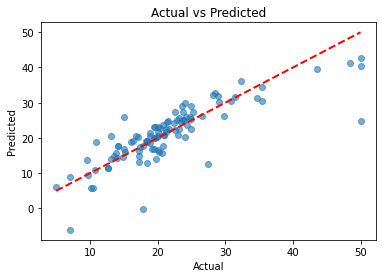

In [47]:

intercept = model.intercept_
coefficients = model.coef_
print("Intercept:", intercept)
print("Coefficient:", coefficients)
plt.scatter(y_test, y_pred ,alpha=0.6)
plt.plot([y_test.min() , y_test.max()] , [y_test.min(), y_test.max()], 'r--' , lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()





In [48]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse =mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)

In [49]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [50]:
lasso_model=Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled,y_train)


Lasso(alpha=0.1)

In [51]:
y_pred=lasso_model.predict(X_test_scaled)

In [52]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred,squared=False)
r2=r2_score(y_test,y_pred)
print(mae,mse,rmse,r2)

3.241803465879464 25.656739367167685 5.06524820390548 0.6501375183238985


In [53]:
intercept=lasso_model.intercept_
coefficients = lasso_model.coef_
print(intercept)
coefficients

22.796534653465343


array([-0.71836455,  0.25962714, -0.        ,  0.69822096, -1.56814243,
        3.27150693, -0.        , -2.28444944,  0.67193802, -0.3566537 ,
       -1.89333519,  1.03136581, -3.60941047])

In [54]:
ridge_model=Ridge(alpha=0.1)
ridge_model.fit(X_train_scaled,y_train)


Ridge(alpha=0.1)

In [55]:
y_pred=ridge_model.predict(X_test_scaled)

In [56]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred,squared=False)
r2=r2_score(y_test,y_pred)
print(mae,mse,rmse,r2)

3.188723109256336 24.29329430966594 4.928822811753932 0.6687298368808312


In [57]:
intercept=ridge_model.intercept_
coefficients = ridge_model.coef_
print(intercept)
coefficients

22.796534653465343


array([-1.00111591,  0.69436316,  0.27539404,  0.71912548, -2.01912122,
        3.14590087, -0.17617627, -3.07816919,  2.24333232, -1.75959591,
       -2.03674427,  1.12933027, -3.61037565])

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,KFold

In [59]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

In [60]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [61]:
mse_score=cross_val_score(model,x_scaled,y,scoring="neg_mean_squared_error",cv=5)
mse_scores=-mse_score
print(mse_scores)

[12.46030057 26.04862111 33.07413798 80.76237112 33.31360656]


In [62]:
mean_mse=np.mean(mse_scores)
print(mean_mse)
std_mse=np.std(mse_scores)
print(std_mse)

37.1318074676989
23.09194533566416


In [63]:
rmse=np.sqrt(mean_mse)
rmse

6.093587405436875

In [64]:
from sklearn.metrics import make_scorer,r2_score

In [65]:
degree =2


In [66]:
poly=PolynomialFeatures(degree)
x_poly=poly.fit_transform(x_scaled)

In [67]:
model=LinearRegression()

k_folds=5
kf=KFold(n_splits=k_folds,shuffle=True,random_state=42)
print(kf)

KFold(n_splits=5, random_state=42, shuffle=True)


In [68]:
r2_scorer=make_scorer(r2_score)
print(r2_scorer)

r2_scores=cross_val_score(model,x_poly,y,cv=kf,scoring=r2_scorer)
print(r2_scores)

make_scorer(r2_score)
[0.80517634 0.78706785 0.63028376 0.91136708 0.83027025]


In [69]:
for fold,r2 in enumerate(r2_scores,1):
    print(f"fold{fold}: R2 Score={r2:.2f}")

fold1: R2 Score=0.81
fold2: R2 Score=0.79
fold3: R2 Score=0.63
fold4: R2 Score=0.91
fold5: R2 Score=0.83


In [70]:
mean_r2=np.mean(r2_scores)
print(f"\nMean R2 Score : {mean_r2:.2f}")


Mean R2 Score : 0.79


In [71]:
r2_scores

array([0.80517634, 0.78706785, 0.63028376, 0.91136708, 0.83027025])

In [72]:
ridge_model=Ridge()

param_grid={'alpha':[0.001,0.01,0.1,1.0,10.0,100.0]}

In [74]:
grid_search=GridSearchCV(ridge_model,param_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

In [75]:
best_alpha=grid_search.best_params_["alpha"]
print(best_alpha)

0.001


In [78]:
best_ridge_model=Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train_scaled,y_train)

Ridge(alpha=0.001)